In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Brainworks_Projects/Dogs_vs_Cats/cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Brainworks_Projects/Dogs_vs_Cats/dogs.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
# Set random seeds for reproducibility
import random
TF_DETERMINISTIC_OPS=1
random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)


In [5]:


train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/data',  # Path to your dataset directory
    labels='inferred',         # Automatically infer labels from subdirectories
    label_mode='int',          # Labels are integers
    batch_size=32,             # Adjust batch size as needed
    image_size=(256, 256),     # Resize images to a consistent size
    shuffle=True,              # Shuffle the dataset
    validation_split=0.2,      # Use 20% of the data for validation
    subset='training',         # Specify that this is the training subset
    seed=42                    # Set a seed for consistent shuffling
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=42  # Same seed to ensure no overlap
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [6]:
#Normalize

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [64]:
#Create CNN Model

model=Sequential()

model.add(Conv2D(8,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))



In [65]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 254, 254, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 125, 125, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,2

 Total params: 697,649 (2.66 MB)

 Trainable params: 697,153 (2.66 MB)

 Non-trainable params: 496 (1.94 KB)

In [66]:
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [68]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.6350 - loss: 1.8126 - val_accuracy: 0.7150 - val_loss: 0.8150
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 65ms/step - accuracy: 0.7568 - loss: 0.7202 - val_accuracy: 0.8016 - val_loss: 0.5800
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8191 - loss: 0.5630 - val_accuracy: 0.8216 - val_loss: 0.5500
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.8507 - loss: 0.5034 - val_accuracy: 0.7818 - val_loss: 0.6140
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8742 - loss: 0.4593 - val_accuracy: 0.8680 - val_loss: 0.4725
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8813 - loss: 0.4404 - val_accuracy: 0.8718 - val_loss: 0.4618
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8937 - loss: 0.4154 - val_accuracy: 0.8770 - val_loss: 0.4452
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8978 - loss: 0.4063 - 

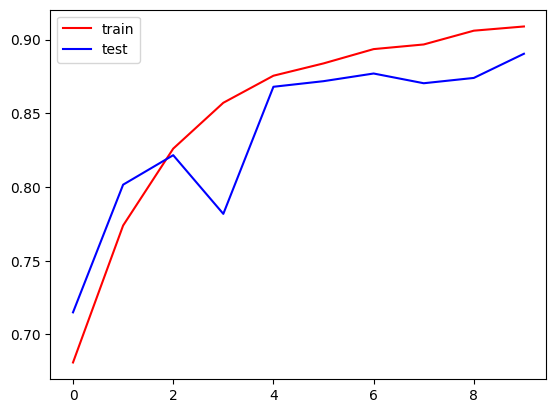

In [69]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

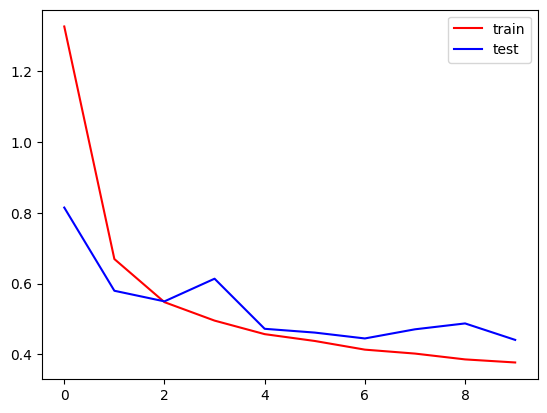

In [70]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()